In [2]:
import requests
import pandas as pd
lat, lon = 45.4215, 75.6972
url = 'https://re.jrc.ec.europa.eu/api/v5_2/PVcalc'
params = {
    "lat": lat,
    "lon": lon,
    "peakpower": 1,          # 1 kWp system
    "loss": 14,              # system losses (%)
    "angle": 30,             # tilt (deg)
    "aspect": 180,           # azimuth (south)
    "outputformat": "json"
}
r = requests.get(url=url, params=params)
data = r.json()

In [3]:
monthly = pd.DataFrame(data["outputs"]["monthly"])
monthly.fixed[1]

{'month': 2,
 'E_d': 0.86,
 'E_m': 24.05,
 'H(i)_d': 1.14,
 'H(i)_m': 31.8,
 'SD_m': 5.52}

In [4]:
annual = data["outputs"]["totals"]["fixed"]["E_y"]
print("Annual PV yield (kWh/kWp):", annual)

Annual PV yield (kWh/kWp): 770.81


In [5]:
print(monthly['fixed'][0].get("E_m"))

19.33


In [6]:
E_m = []
for i in range(0, len(monthly['fixed'])):
    E_m.append(monthly['fixed'][i].get("E_m"))


In [7]:
len(E_m)

12

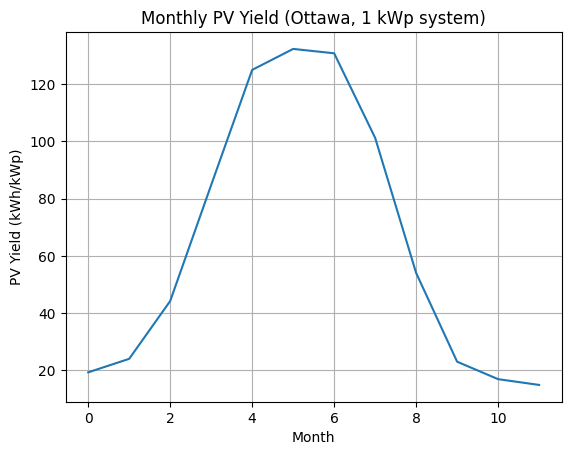

In [9]:
import matplotlib.pyplot as plt
plt.plot(E_m)
plt.xlabel("Month")
plt.ylabel("PV Yield (kWh/kWp)")
plt.title("Monthly PV Yield (Ottawa, 1 kWp system)")
plt.grid(True)
plt.show()